In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster
from google.colab import files
from calendar import month_name as mn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Dataset


In [ ]:
sheet_id1 = '16s0LqVAOo0cLQEq7RGllOtFzp4VQ8icA7awnngTL0Zw'
df  = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id1}/export?format=csv")
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/1/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Handling Irrelevant Values



In [ ]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

<ipython-input-4-de4fb99c154f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])
<ipython-input-4-de4fb99c154f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship_Date']=pd.to_datetime(df['Ship_Date'])


# Droping Irrelevant Columns

In [ ]:
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [ ]:
df_clean = df.drop(['Row_ID', 'Postal_Code'],1)
df_clean.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


# Inserting Time Series

In [ ]:
df_clean['Order_Day'] = df_clean['Order_Date'].dt.day_name()
df_clean['Order_Month'] = df_clean['Order_Date'].dt.month_name()
df_clean['Order_Month_Number'] = df_clean['Order_Date'].dt.strftime("%m")
df_clean['Order_Year'] = df_clean['Order_Date'].dt.strftime("%Y")
df_clean.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Order_Day,Order_Month,Order_Month_Number,Order_Year
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Friday,August,08,2017
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Friday,August,08,2017
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Wednesday,December,12,2017
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Thursday,November,11,2016
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,Thursday,November,11,2016


# Check Duplicated Values

In [ ]:
duplicate_rows_before_cleaning = df_clean.duplicated().sum()
print("Number of duplicates before cleaning:", duplicate_rows_before_cleaning)

Number of duplicates before cleaning: 1


In [ ]:
#drop duplicate data
df_clean = df_clean.drop_duplicates(keep="first")

duplicate_rows_after_cleaning = df_clean.duplicated().sum()

print("Number of duplicates after cleaning:", duplicate_rows_after_cleaning)

Number of duplicates after cleaning: 0


# Check Typo

In [ ]:
for col_name in ['Ship_Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub_Category']:
       print(df_clean[col_name].value_counts(),'\n')

Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: Ship_Mode, dtype: int64 

Consumer       5101
Corporate      2953
Home Office    1745
Name: Segment, dtype: int64 

United States    9799
Name: Country, dtype: int64 

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64 

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     453
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137

In [ ]:
df_clean['Sales'].describe()

count     9799.000000
mean       230.763895
std        626.683644
min          0.444000
25%         17.248000
50%         54.480000
75%        210.572000
max      22638.480000
Name: Sales, dtype: float64

# Removing Outliers

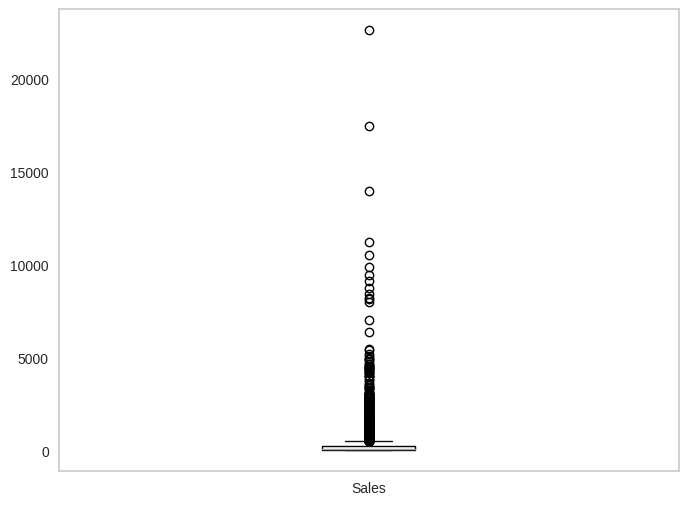

In [ ]:
#Checking Outlier
num_col = ['Sales']

# Chart position and size
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot
a = df_clean.boxplot(num_col, ax=ax, grid=False)

#Show the box plot
plt.show()

IQR Method

In [ ]:
#Find Q1 and Q3
Q1 = df_clean['Sales'].quantile(0.25)
Q3 = df_clean['Sales'].quantile(0.75)
IQR = Q3-Q1

#Find Top Bottom Limit
Box_Min = Q1 - 1.5 * IQR
Box_Max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',Box_Min)
print('\nMax:\n',Box_Max)

Q1:
 17.248

Q3:
 210.572

IQR:
 193.324

Min:
 -272.738

Max:
 500.558


In [ ]:
#Create Filtering
Fil_Min = df_clean['Sales'] < Box_Min
Fil_Max = df_clean['Sales'] > Box_Max

#Drop Outlier
clean_outlier = df_clean.loc[~(Fil_Min | Fil_Max)]
df_main = clean_outlier
df_main['Sales'].describe()

count    8654.000000
mean       93.191587
std       114.682080
min         0.444000
25%        15.011000
50%        40.832000
75%       124.360000
max       500.240000
Name: Sales, dtype: float64

<Axes: >

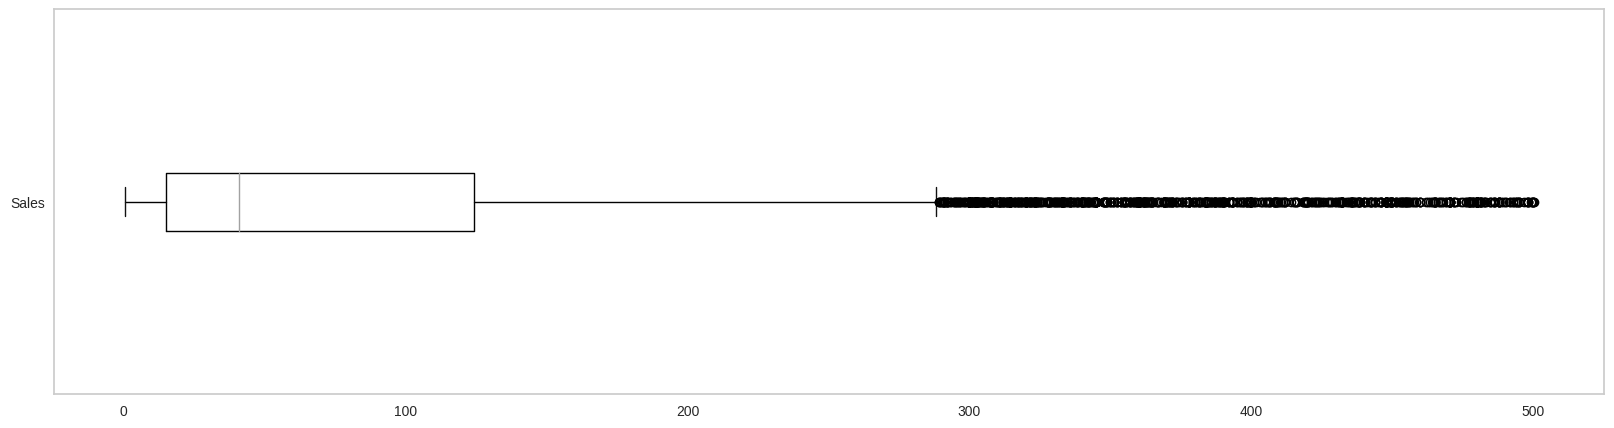

In [ ]:
#Using Matplotlib
df_main.boxplot(column=['Sales'],
                       fontsize=10,
                       rot=0,
                       grid=False,
                       figsize=(20,5),
                       vert=False)

<Axes: xlabel='Sales'>

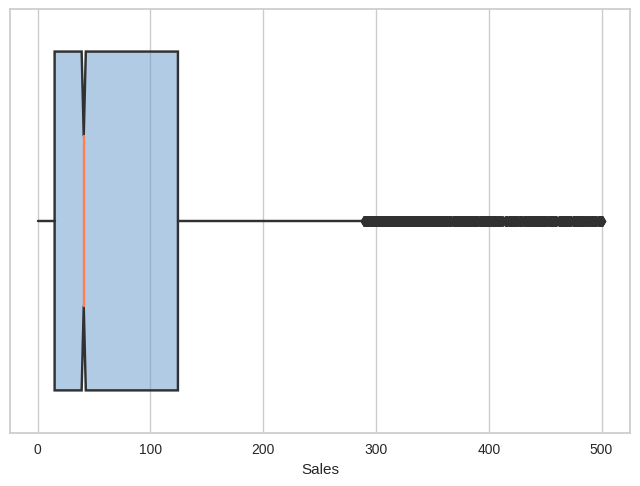

In [ ]:
#Visualization using seaborn
sns.boxplot(x=df_main['Sales'],
            notch=True, showcaps=False,
            boxprops={"facecolor":(.4, .6, .8, .5)},
            medianprops = {"color" :"Coral"})

Descriptive Statistic

In [ ]:
test = df_main['Sales'].copy()
summary = round(test.describe(), 3)
summary['Mode'] = stats.mode(test)
summary['Variance'] = test.var()
summary['Range'] = test.max() - test.min()
summary['Interquartile Range'] = stats.iqr(test, rng=(25,75))
summary['Coefficient of Variation'] = stats.variation(test, axis=0)
summary['Skewness'] = stats.skew(test._get_numeric_data(), nan_policy='omit')
summary['Kurtosis'] = stats.kurtosis(test._get_numeric_data(), nan_policy='omit')
summary

count                             8654.0
mean                              93.192
std                              114.682
min                                0.444
25%                               15.011
50%                               40.832
75%                               124.36
max                               500.24
Mode                         (12.96, 55)
Variance                    13151.979557
Range                            499.796
Interquartile Range              109.349
Coefficient of Variation        1.230534
Skewness                        1.685722
Kurtosis                        2.073789
Name: Sales, dtype: object

<Axes: xlabel='Sales', ylabel='Count'>

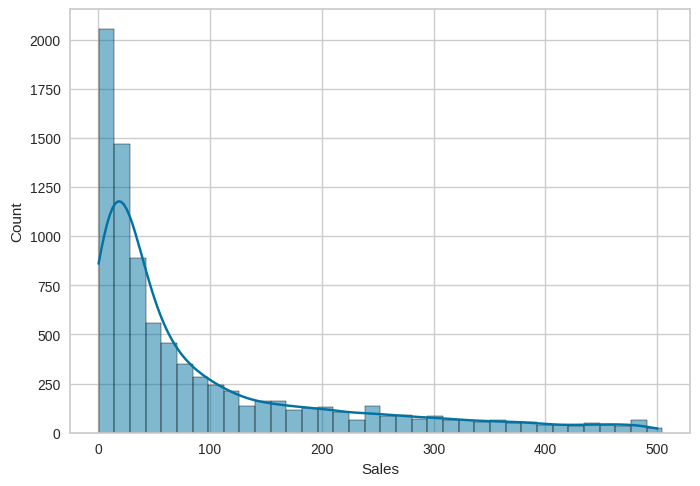

In [ ]:
# visualization of the data
sns.histplot(data=df_main, x='Sales',binwidth=14,kde=True)

In [ ]:
# finding Pearson's second coefficient
x = test.mean()
y = test.median()
z = test.std()
pearson_2nd = 3*(x-y)/z
pearson_2nd

1.3696888114578156

# Visualization

**Monthly Transaction**

In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8654 entries, 0 to 9799
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            8654 non-null   object        
 1   Order_Date          8654 non-null   datetime64[ns]
 2   Ship_Date           8654 non-null   datetime64[ns]
 3   Ship_Mode           8654 non-null   object        
 4   Customer_ID         8654 non-null   object        
 5   Customer_Name       8654 non-null   object        
 6   Segment             8654 non-null   object        
 7   Country             8654 non-null   object        
 8   City                8654 non-null   object        
 9   State               8654 non-null   object        
 10  Region              8654 non-null   object        
 11  Product_ID          8654 non-null   object        
 12  Category            8654 non-null   object        
 13  Sub_Category        8654 non-null   object      

In [ ]:
# Group by Order_Year and Order_Month, then count Order_ID
month_order = df_main.groupby(['Order_Year', 'Order_Month'])['Order_ID'].count().reset_index()

# month list
months = mn[1:]

# convert the column to categorical and ordered
month_order.Order_Month = pd.Categorical(month_order.Order_Month, categories=months, ordered=True)

sorted_month_order = month_order.sort_values(by=['Order_Year', 'Order_Month'])
sorted_month_order

,Order_Year,Order_Month,Order_ID
4,2015,January,108
3,2015,February,77
7,2015,March,141
0,2015,April,108
8,2015,May,134
6,2015,June,118
5,2015,July,138
1,2015,August,126
11,2015,September,205
10,2015,October,124


Text(0.5, 0.98, 'Monthly Number of Orders (from 2015-2018)')

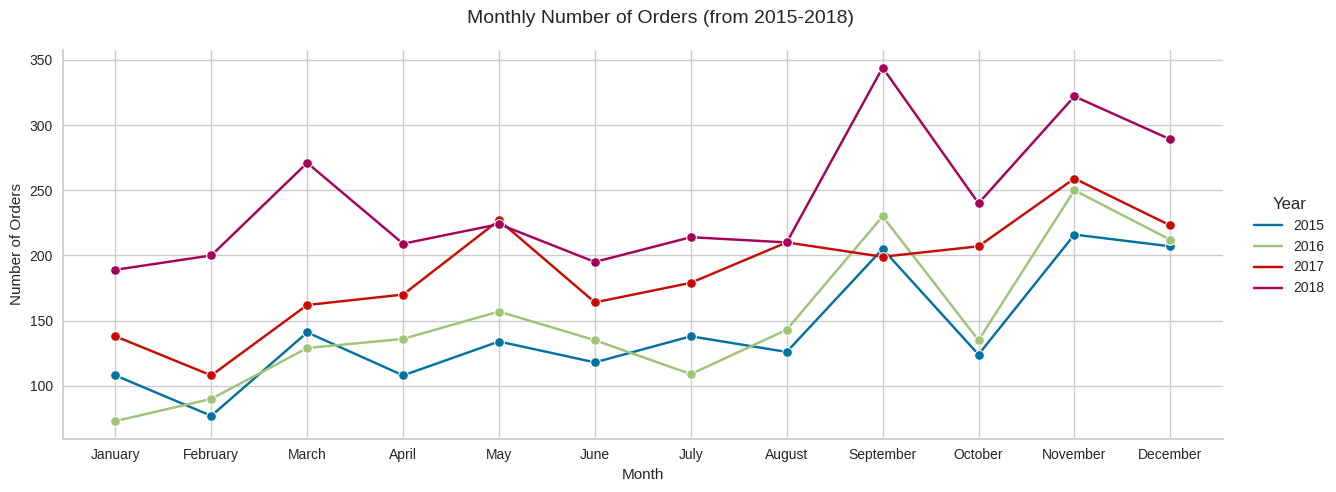

In [ ]:
# plot the data
p = sns.relplot(kind='line', data=month_order, x='Order_Month', y='Order_ID', hue='Order_Year', aspect=2.5, marker='o')

# Set titles and labels
p.set_axis_labels(x_var="Month", y_var="Number of Orders")
p.set_titles("Monthly Orders by Year")

# Customize legend title (optional)
p._legend.set_title("Year")

# Set chart title
plt.subplots_adjust(top=0.9)  # Adjust the top margin to make space for the title
p.fig.suptitle('Monthly Number of Orders (from 2015-2018)', fontsize=14)

# Add labels to data points
#for line in p.ax.lines:
    #x, y = line.get_data()
    #for i, (xi, yi) in enumerate(zip(x, y)):
        #plt.text(xi, yi, str(int(yi)), ha='right', va='bottom' if i % 2 == 0 else 'top')

**INSIGHT**

* **Highest Peak:** **September 2018** marked the highest peak in order volume throughout the entire period. Additionally, September consistently remains the month with the highest order volume each year.

* **Monthly Trends:** The data indicates a recurring monthly trend from 2015 to 2018. In certain months such as **March, May, July, September, and November**, there are significant **increases in order** volume.

* **Monthly Cycles:** There is also an interesting monthly cyclic pattern. Every month, **there is an increase in orders followed by a decrease in the following month**. This shows a consistent pattern throughout the years.





**Overall Sales Trend**

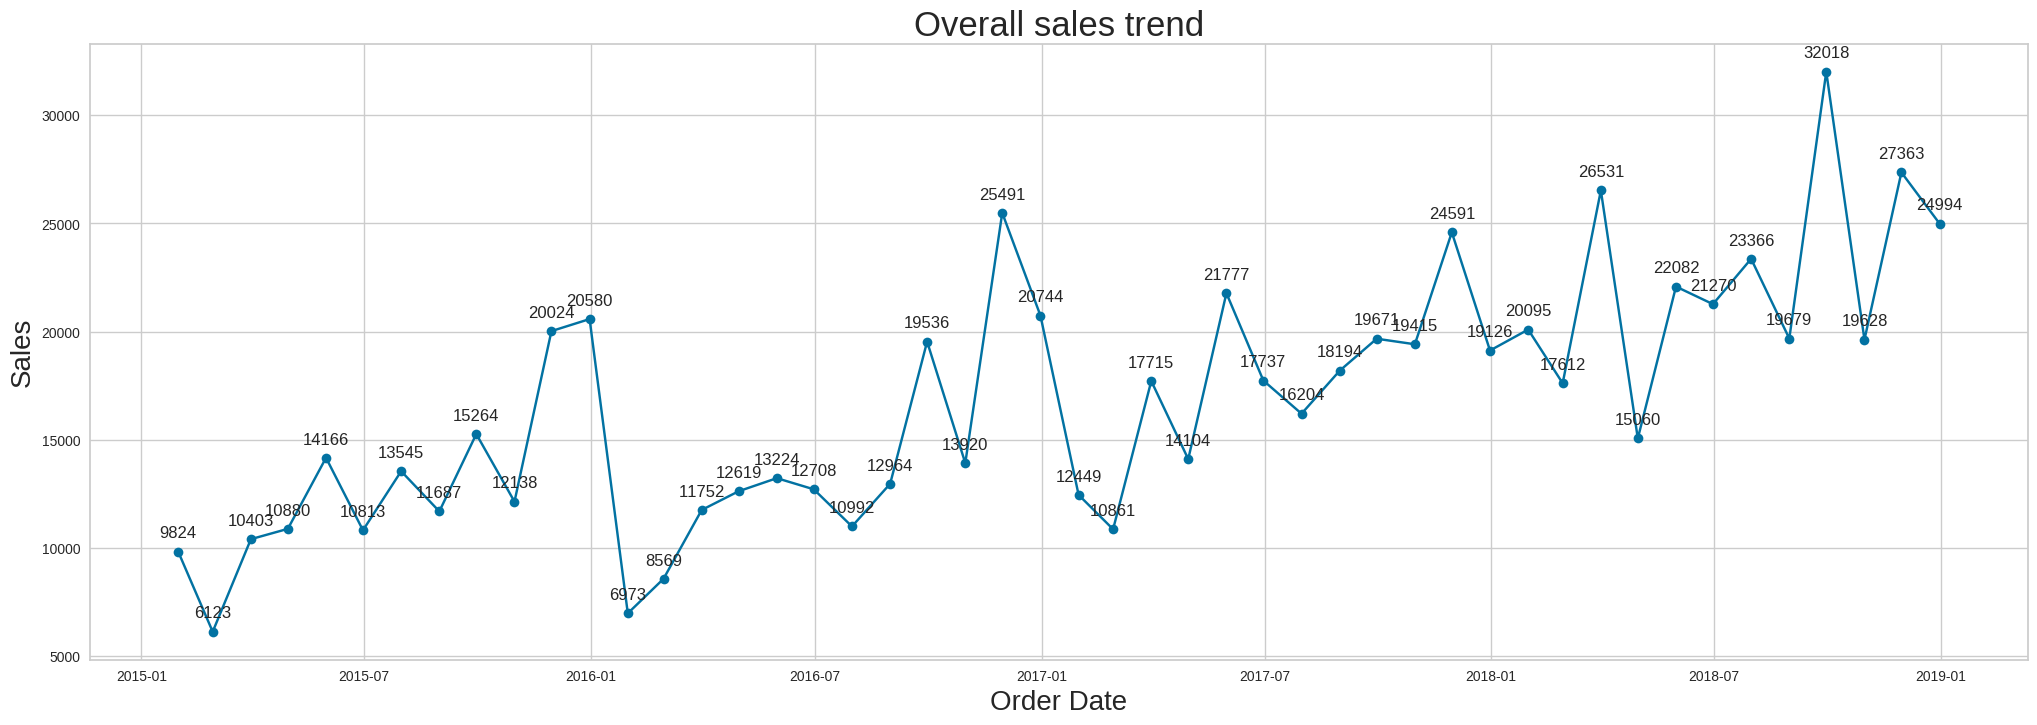

In [ ]:
# set the order date column as the index of the dataframe
monthly_sale = df_main.set_index('Order_Date')
# Resample the data into monthly intervals
monthly_sale = monthly_sale.resample('M').sum()
plt.figure(figsize = (25,8))
plt.plot(monthly_sale['Sales'], 'bo-')
plt.xlabel('Order Date',size = 20)
plt.ylabel('Sales',size=20)
plt.title('Overall sales trend',size = 25)

#Show Label Point
for i, (date, sales) in enumerate(zip(monthly_sale.index, monthly_sale['Sales'])):
        plt.annotate(f'{sales:.0f}'.format(sales), (date, sales), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

**INSIGHT**

*   There is a significant **drop in sales** from **December to January** every year.

**Orders and Sales by Days**

In [ ]:
df_main = df_main.copy()
df_main['Order_Day'] = pd.Categorical(df_main['Order_Date'].dt.dayofweek + 1, categories=range(1, 8), ordered=True)

day_order = list(calendar.day_name)

daily_orders = df_main.groupby(df_main['Order_Day'])['Order_ID'].count().reset_index()
daily_orders

,Order_Day,Order_ID
0,1,1385
1,2,1552
2,3,1166
3,4,800
4,5,996
5,6,1377
6,7,1378


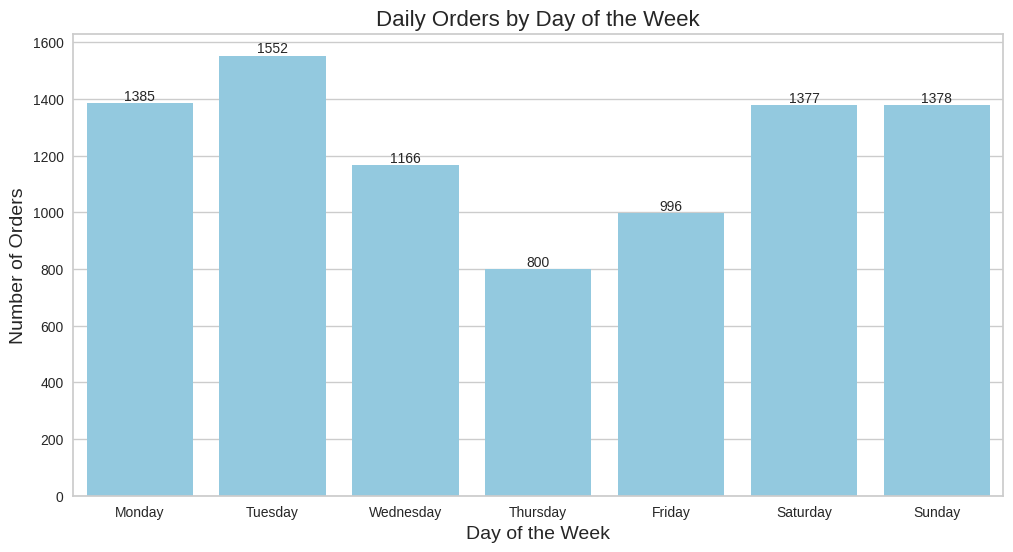

In [ ]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Order_Day', y='Order_ID', data=daily_orders, color='skyblue')

# Set judul dan label
plt.title('Daily Orders by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Atur label x menjadi nama hari (Senin-Minggu)
plt.xticks(ticks=range(7), labels=day_order)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',  # Label yang akan ditampilkan
                (p.get_x() + p.get_width() / 2, height),  # Posisi label
                ha='center', va='bottom', fontsize=10)  # Posisi teks label

plt.show()


**INSIGHT**

*   **Tuesday** records the **highest order** activity, indicating that it is the day with the highest order volume in a week.

* Significant **Decrease in Orders** on **Wednesdays and Thursdays**.

* Order volume starts to increase from Fridays to Mondays. This suggests that **weekends**, especially Fridays, Saturdays, and Sundays, tend to be periods with **high order activity**.





**Sales by Product Category**

In [ ]:
# take subset of data without outliers
df_category = df_main[['Category', 'Sales']]
# take groupby on category
df_category = df_category.groupby(['Category']).sum().reset_index().sort_values(by='Sales')
df_category

,Category,Sales
2,Technology,225412.1850
0,Furniture,243089.0628
1,Office Supplies,337978.7500


In [ ]:
# take subset of data with outliers
df_category_outlier = df[['Category', 'Sales']]
# take groupby on category
df_category_outlier = df_category_outlier.groupby(['Category']).sum().reset_index().sort_values(by='Sales', ascending=False)
df_category_outlier

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


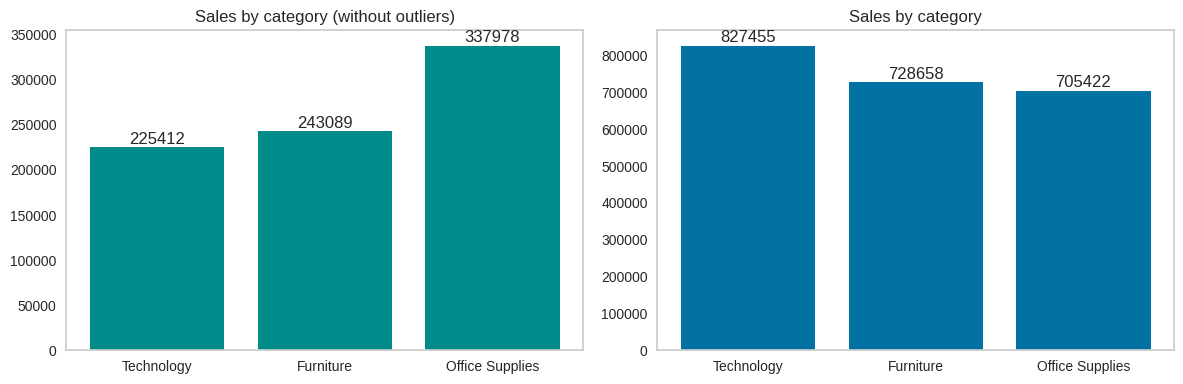

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# plot without outlier
bars1=axes[0].bar(x=df_category['Category'], height=df_category['Sales'], color = '#008B8B')
axes[0].set_title('Sales by category (without outliers)')
axes[0].grid(False)

#adding label for bar 1
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

# plot with outlier
bars2=axes[1].bar(x=df_category_outlier['Category'], height=df_category_outlier['Sales'])
axes[1].set_title('Sales by category')
axes[1].grid(False)

#adding label for bar 2
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom')

# showing the plot
plt.tight_layout()
plt.show()

**INSIGHT**

Data Without Outliers:

* The **Office Supplies** category is the **primary contributor** to the **company's revenue.** This may be due to the consistent and stable sales of products in this category.

* **The Technology category has lower sales**, possibly because technology products are generally more expensive and may have fewer sales in quantity, affecting the total revenue.

Data With Outliers:

* In the data with outliers, the **Technology category** suddenly becomes the **highest in sales**. This may be due to significant outlier transactions within this category.

**Order by Product Category**

In [ ]:
# take subeset of data
cat_order = df_main[['Category', 'Order_ID']]

# take groupby on category
cat_order = cat_order.groupby(['Category']).count().reset_index().sort_values(by='Order_ID')
cat_order.columns = ['product_category', 'number_of_orders']

# converting 'number of orders' into percentage
cat_order['percentage'] = (cat_order['number_of_orders'] / cat_order['number_of_orders'].sum()) * 100
cat_order

,product_category,number_of_orders,percentage
2,Technology,1419,16.397042
0,Furniture,1618,18.696557
1,Office Supplies,5617,64.906402


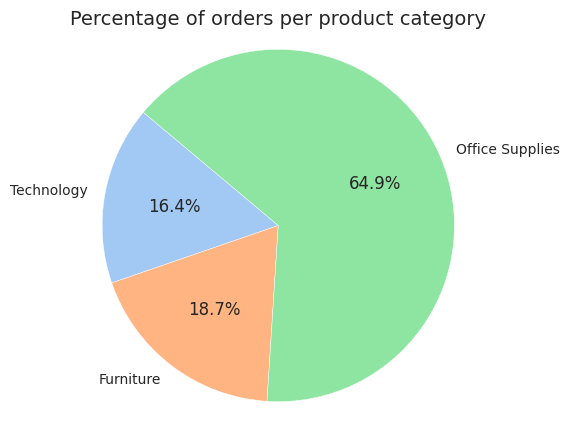

In [ ]:
#plot
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("pastel")

order_data = cat_order['number_of_orders']
cat_label = cat_order['product_category']

plt.pie(order_data, labels=cat_label, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of orders per product category', fontsize=14)
plt.axis('equal')
plt.show()

**INSIGHT**

* Despite having the highest sales, **the Technology category** accounts for only **16% of the total order volume**. This indicates that products in the **Technology category may have higher per-item value or larger orders**. This could indicate high-priced products or large transactions in this category.

* **The Office Supplies category** may have lower-priced products or smaller orders, but it still c**ontributes 64% of the total order volume**, which is a significant contribution. This suggests that products in this category **have strong appeal to customers and may result in more frequent orders**.


**Top Order Sub Category Product**

In [ ]:
# take subset of data
subcat_order = df_main[['Sub_Category', 'Order_ID', 'Sales']]

# take group by on category
subcat_order = subcat_order.groupby(['Sub_Category']).agg({'Order_ID': 'count', 'Sales': 'sum'}).reset_index().sort_values(by='Order_ID')
subcat_order.columns = ['sub_category', 'number_of_orders', 'total_sales']
subcat_order

,sub_category,number_of_orders,total_sales
6,Copiers,11,4859.8380
11,Machines,50,12465.3170
4,Bookcases,164,40169.5663
16,Tables,169,44075.8235
15,Supplies,170,8893.5020
8,Fasteners,214,3001.9600
7,Envelopes,247,15523.3900
10,Labels,355,10932.0620
5,Chairs,384,91263.1670
1,Appliances,405,46720.7290


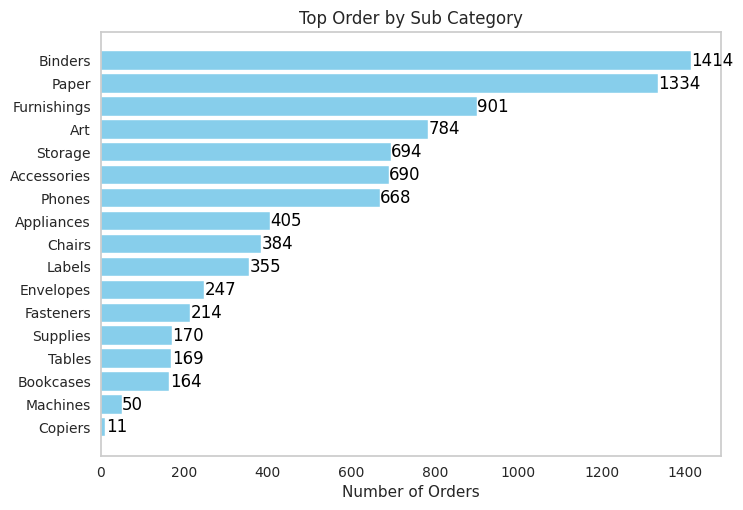

In [ ]:
#plot
categories = subcat_order['sub_category']
values = subcat_order['number_of_orders']

plt.barh(categories, values, color='skyblue')

# Adding label
plt.xlabel('Number of Orders')
plt.title('Top Order by Sub Category')
plt.grid(False)

for i, v in enumerate(values):
    plt.text(v + 1, i, str(v), color='black', va='center')

**INSIGHT**

* **Binders** are the sub-category with the **highest number of orders**, totaling **1,414 orders**, followed by **Paper with 1,334 orders**. This indicates strong demand for these products.

* **The third position** is held by **Furnishing with 901 orders**, suggesting that furnishing products also have good popularity among customers.

* **The top 5 sub-categories** are **dominated** by the **Office Supplies **category, indicating that products in this category significantly contribute to the overall order volume.

**Top Sales by Sub Category**

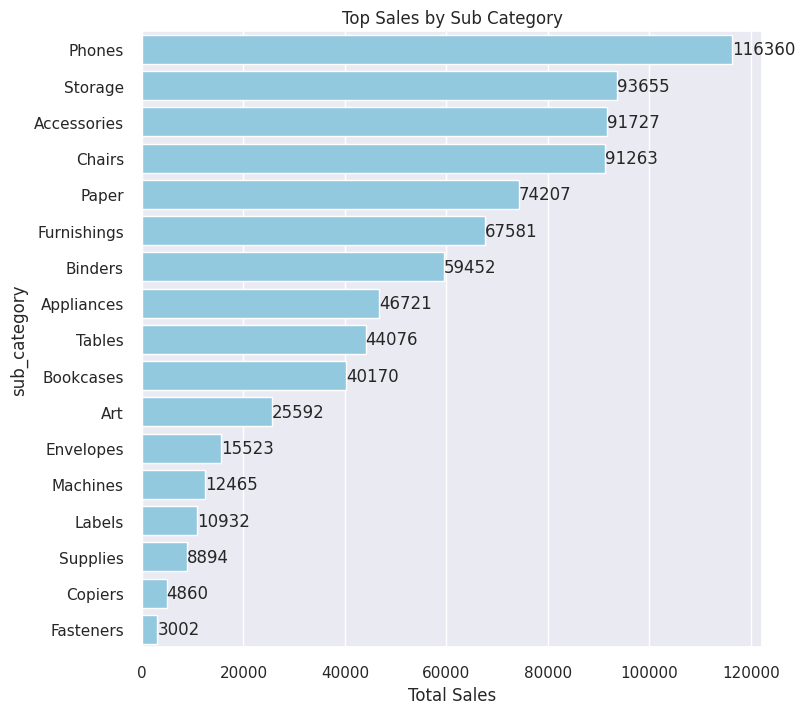

In [ ]:
#Sorted by Sales
subcat_order_sorted=subcat_order.sort_values('total_sales', ascending=False)

categories = subcat_order_sorted['sub_category']
values = subcat_order_sorted['total_sales']

sns.set(style="darkgrid")
plt.figure(figsize=(8, 8))
ax=sns.barplot(x='total_sales', y='sub_category', data=subcat_order_sorted, color='skyblue')

# Adding label
plt.xlabel('Total Sales')
plt.title('Top Sales by Sub Category')

for p in ax.patches:
    width = p.get_width()
    ax.text(x=width + 0.5, y=p.get_y() + p.get_height() / 2,
            s='{:.0f}'.format(width),
            va='center')

**INSIGHT**

* **Phones** have the **highest total sales at $116,360**, indicating strong customer demand and **significant revenue contribution to the company**.

* Interestingly, **in the highest order** chart, **Phones are in the seventh position**. This suggests that while the quantity of **Phone orders may not be as high as the dominating Office Supplies** category, **Phone products have high value.**

**Orders and Sales by Region**

In [ ]:
# take subeet of data
region_order = df_main[['Region', 'Order_ID', 'Sales']]

# take groupby on category
region_order = region_order.groupby(['Region']).agg({'Order_ID': 'count', 'Sales': 'sum'}).reset_index().sort_values(by='Order_ID')
region_order.columns = ['region', 'number_of_orders', 'total_sales']

# converting 'number of orders' into percentage
region_order['percentage_orders'] = (region_order['number_of_orders'] / region_order['number_of_orders'].sum()) * 100
region_order

# converting 'total_sales' into percentage
region_order['percentage_sales'] = (region_order['total_sales'] / region_order['total_sales'].sum()) * 100
region_order

,region,number_of_orders,total_sales,percentage_orders,percentage_sales
2,South,1401,127524.8815,16.189046,15.812529
0,Central,2024,180207.3958,23.388029,22.344931
1,East,2457,229070.5860,28.391495,28.403753
3,West,2772,269677.1345,32.031431,33.438788


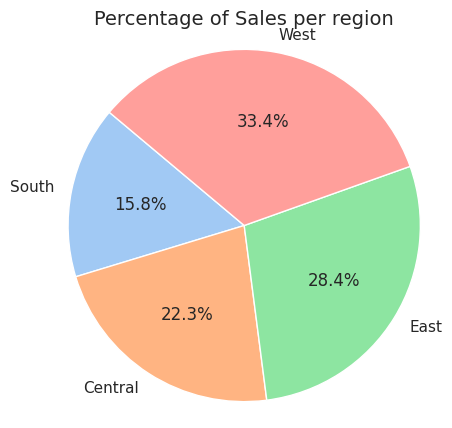

In [ ]:
#plot
plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
sns.set_palette("pastel")

sales_data = region_order['total_sales']
region_label = region_order['region']

plt.pie(sales_data, labels=region_label, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sales per region', fontsize=14)
plt.axis('equal')
plt.show()

**INSIGHT**

* **West, East, and Central regions dominate sales**, with West contributing 33.4% of total sales, East contributing 28.4%, and Central contributing 22.3%.

* The **South region has a smaller contribution to sales**, accounting for 15.8%. This area may require attention to increase market share.

# **Business Recommendation**


* Leverage the consistent monthly and cyclic trends by planning marketing and promotional activities around peak months (March, May, July, September, November) to capitalize on increased order volume.

* Implement targeted marketing strategies to boost sales during the holiday season and address the drop in sales from December to January.

* Focus on optimizing sales and order count within the Technology category, potentially by introducing promotions, expanding product offerings, or targeting high-value customers.

* Explore opportunities to enhance the revenue value in the Office Supplies category, including strategies to increase the average order value or cross-sell complementary products.

* Consider expanding the product range within the Office Supplies category, which has consistently shown high order volume.

* Invest in marketing efforts to raise the profile of the South region and increase its market share.


# **Download Dataset**

In [ ]:
#from google.colab import files
#df_main.to_csv("Superstore Clean.csv", index=False)

#files.download('Superstore Clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Feature Engineering (RFM)**

In [ ]:
consolidated_data = df_main.groupby(['Customer_ID', 'Order_ID']).agg({
    'Order_Date': 'max',
    'Sales': 'sum'
}).reset_index()

consolidated_data.head()

,Customer_ID,Order_ID,Order_Date,Sales
0,AA-10315,CA-2015-128055,2015-03-31,52.98
1,AA-10315,CA-2015-138100,2015-09-15,29.50
2,AA-10315,CA-2016-121391,2016-04-10,26.96
3,AA-10315,CA-2017-103982,2017-03-03,476.00
4,AA-10315,CA-2018-147039,2018-06-29,374.48


In [ ]:
latest_date = consolidated_data['Order_Date'].max()

#Create RFM features by 'Customer_ID'
rfm = consolidated_data.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (latest_date - x.max()).days,  # Recency
    'Order_ID': 'nunique',  # Frequency
    'Sales': 'sum'         # Monetary
}).reset_index()

rfm.rename(columns={'Order_Date': 'Recency', 'Order_ID': 'Frequency', 'Sales': 'Monetary'}, inplace=True)

rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,AA-10315,184,5,959.920
1,AA-10375,48,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,233,6,1088.700
4,AB-10015,445,3,886.156


In [ ]:
#drop Customer_ID
rfm_without_customer_id = rfm.drop(columns=['Customer_ID'])

#scaling data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_without_customer_id)

rfm_scaled = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])
rfm_scaled.head()


,Recency,Frequency,Monetary
0,0.035600,-0.359270,-0.093666
1,-0.638155,1.283702,0.054609
2,0.407157,-0.770013,1.182957
3,0.278351,0.051473,0.104269
4,1.328617,-1.180757,-0.207042


Modelling K-Means Clustering

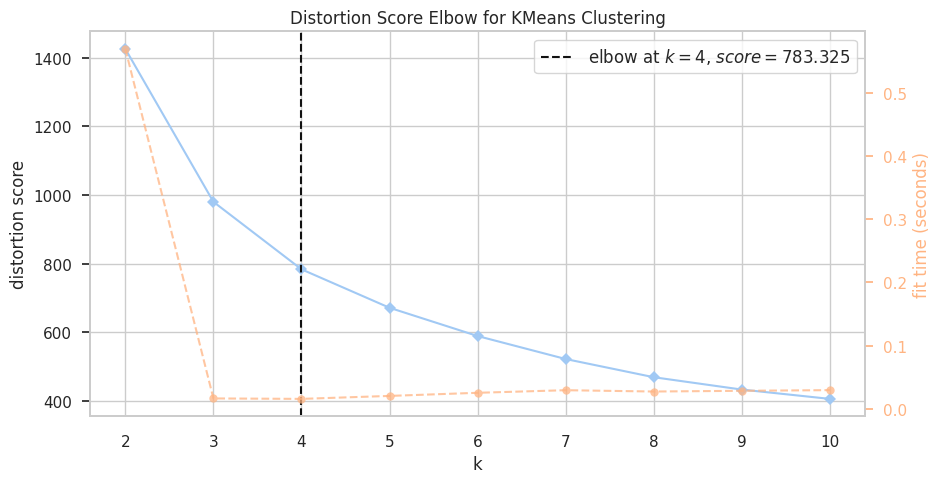

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Finding initial K value using Elbow Method
plt.figure(figsize=(10,5))
ax = plt.axes()
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_scaled)
Elbow_M.show()

In [ ]:
#KMeans Clustering
kmeans = KMeans(n_clusters=4,max_iter=100, random_state=0)
kmeans.fit(rfm_scaled)

KMeans(max_iter=100, n_clusters=4, random_state=0)

In [ ]:
rfm_scaled["clusters"]=kmeans.labels_
rfm["clusters"]=kmeans.labels_
#df_main["clusters"] = kmeans.labels_
rfm_scaled.head()

,Recency,Frequency,Monetary,clusters
0,0.035600,-0.359270,-0.093666,3
1,-0.638155,1.283702,0.054609,0
2,0.407157,-0.770013,1.182957,0
3,0.278351,0.051473,0.104269,0
4,1.328617,-1.180757,-0.207042,1


In [ ]:
result_df = pd.concat([rfm['Customer_ID'], rfm_scaled], axis=1)

result_df.head(10)

,Customer_ID,Recency,Frequency,Monetary,clusters
0,AA-10315,0.035600,-0.359270,-0.093666,3
1,AA-10375,-0.638155,1.283702,0.054609,0
2,AA-10480,0.407157,-0.770013,1.182957,0
3,AA-10645,0.278351,0.051473,0.104269,0
4,AB-10015,1.328617,-1.180757,-0.207042,1
5,AB-10060,-0.355772,0.872959,0.526779,0
6,AB-10105,-0.672834,1.283702,2.511650,2
7,AB-10150,-0.672834,-0.359270,-0.083230,0
8,AB-10165,-0.350818,0.872959,0.142906,0
9,AB-10255,-0.053573,1.283702,-0.163428,0


In [ ]:
rfm["clusters"]=kmeans.labels_

cluster_summary_customer = rfm.groupby('clusters').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer_ID': 'count'
}).reset_index()

cluster_summary_customer.rename(columns={'Customer_ID': 'Customer_Count'}, inplace=True)

cluster_summary_customer

,clusters,Recency,Frequency,Monetary,Customer_Count
0,0,105.353147,6.839161,1120.733996,286
1,1,594.076923,3.490385,615.638162,104
2,2,91.669118,9.169118,2051.545503,136
3,3,133.715909,4.071970,541.339083,264


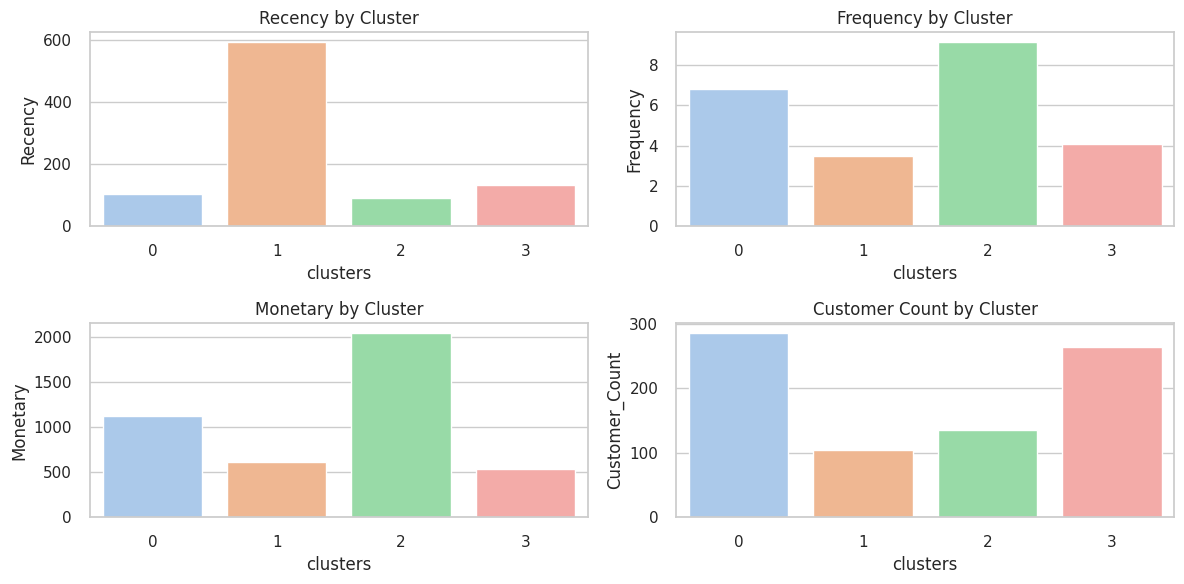

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='clusters', y='Recency', data=cluster_summary_customer)
plt.title('Recency by Cluster')

plt.subplot(2, 2, 2)
sns.barplot(x='clusters', y='Frequency', data=cluster_summary_customer)
plt.title('Frequency by Cluster')

plt.subplot(2, 2, 3)
sns.barplot(x='clusters', y='Monetary', data=cluster_summary_customer)
plt.title('Monetary by Cluster')

plt.subplot(2, 2, 4)
sns.barplot(x='clusters', y='Customer_Count', data=cluster_summary_customer)
plt.title('Customer Count by Cluster')

plt.tight_layout()
plt.show()